В данном ноутбуке проведены исследования по 1-2 шагам из README:

    === ШАГ 1: Исследование данных ===
        ЭТАП 1: Исследование и анализ данных о клиентах
        ЭТАП 2: EDA
        ЭТАП 3: Сохранение данных

    === ШАГ 2: Подготовка инфраструктуры ===


=== ШАГ 1: Исследование данных ===
ЭТАП 1: Исследование и анализ данных о клиентах

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def load_data_safe(file_name):
    """
    Безопасно загружает CSV файл с обработкой ошибок
    """
    try:
        df = pd.read_csv(file_name)
        print(f"✅ УСПЕХ: {file_name} загружен")
        return df
    except FileNotFoundError:
        print(f"❌ ОШИБКА: Файл {file_name} не найден")
        return None
    except Exception as e:
        print(f"❌ ОШИБКА при загрузке {file_name}: {e}")
        return None

In [3]:
# Загрузка данных с обработкой ошибок
category_tree = load_data_safe('data/category_tree.csv')
events = load_data_safe('data/events.csv')
item_properties_part1 = load_data_safe('data/item_properties_part1.csv')
item_properties_part2 = load_data_safe('data/item_properties_part2.csv')


✅ УСПЕХ: data/category_tree.csv загружен
✅ УСПЕХ: data/events.csv загружен
✅ УСПЕХ: data/item_properties_part1.csv загружен
✅ УСПЕХ: data/item_properties_part2.csv загружен


In [4]:

# Выведем основную информацию о каждом датасете
print("=== category_tree ===")
category_tree.info()
category_tree.head(10)


=== category_tree ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
5,231,NaN
6,542,378.0
7,1146,542.0
8,1140,542.0
9,1479,1537.0


`category_tree.csv` — таблица из двух столбцов: «родительская категория» и «дочерняя категория». Типичный способ представления таблицы в виде дерева.

In [5]:
print("\n=== events ===")
events.info()
events.head(10)


=== events ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
5,1433224086234,972639,view,22556,NaN
6,1433221923240,810725,view,443030,NaN
7,1433223291897,794181,view,439202,NaN
8,1433220899221,824915,view,428805,NaN
9,1433221204592,339335,view,82389,NaN


`events.csv` — таблица с логом событий:  
- `timestamp` — временная метка события,  
- `visitorid`— идентификатор пользователя,  
- `event` — событие (просмотр, добавление в корзину, покупка),  
- `itemid` — идентификатор товара,  
- `transactionid` — идентификатор транзакции (покупки)  

In [6]:
print("\n=== item_properties_part1 ===")
item_properties_part1.info()
item_properties_part1.head(10)


=== item_properties_part1 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 335.7+ MB


,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
5,1436065200000,285026,available,0
6,1434250800000,89534,213,1121373
7,1431831600000,264312,6,319724
8,1433646000000,229370,202,1330310
9,1434250800000,98113,451,1141052 n48.000


`item_properties_part1.csv` — таблица со свойствами товаров:  
- `timestamp` — временная метка добавления свойства,  
- `itemid` — идентификатор товара,  
- `property` — свойство товара,  
- `value` — значение свойства.  

In [7]:
print("\n=== item_properties_part2 ===")
item_properties_part2.info()
item_properties_part2.head(10)


=== item_properties_part2 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9275903 entries, 0 to 9275902
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 283.1+ MB


,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062
5,1433041200000,286407,202,820407
6,1438484400000,256368,888,437265 1296497 n24.000 229949 651738 285933
7,1437879600000,307534,888,150169 212349 1095303 824508 1257235 153900
8,1439089200000,102767,888,5135 790941 1055803 221748 122132 n12.000 1135...
9,1431831600000,215180,71,1096621


`item_properties_part2.csv` — таблица со свойствами товаров:  
- `timestamp` — временная метка добавления свойства,  
- `itemid` — идентификатор товара,  
- `property` — свойство товара,  
- `value` — значение свойства.  

In [ ]:
# Объединим item_properties_part1 и item_properties_part2 в один датафрейм
item_properties = pd.concat([item_properties_part1, item_properties_part2], ignore_index=True)
print(f"📊 Объединенная таблица item_properties: {item_properties.shape[0]:,} строк")


📊 Объединенная таблица item_properties: 20,275,902 строк

БАЗОВЫЙ АНАЛИЗ ДАННЫХ

1. 📂 CATEGORY_TREE:
   - Всего категорий: 1669
   - Категории без родителя (корневые): 25
   - Уникальных родительских категорий: 362
   - Уникальных дочерних категорий: 1669


In [9]:
# Проверка на пропуски
print("\n4. ❓ ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
print(f"   - category_tree пропуски: {category_tree.isnull().sum().sum()}")
print(f"   - events пропуски: {events.isnull().sum().sum()}")
print(f"   - item_properties пропуски: {item_properties.isnull().sum().sum()}")


4. ❓ ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:
   - category_tree пропуски: 25
   - events пропуски: 2733644
   - item_properties пропуски: 0


In [10]:

# Базовый анализ каждого датасета
print("\n" + "="*60)
print("БАЗОВЫЙ АНАЛИЗ ДАННЫХ")
print("="*60)

# 1. Анализ category_tree
print("\n1. 📂 CATEGORY_TREE:")
print(f"   - Всего категорий: {len(category_tree)}")
print(f"   - Категории без родителя (корневые): {category_tree['parentid'].isna().sum()}")
print(f"   - Уникальных родительских категорий: {category_tree['parentid'].nunique()}")
print(f"   - Уникальных дочерних категорий: {category_tree['categoryid'].nunique()}")


БАЗОВЫЙ АНАЛИЗ ДАННЫХ

1. 📂 CATEGORY_TREE:
   - Всего категорий: 1669
   - Категории без родителя (корневые): 25
   - Уникальных родительских категорий: 362
   - Уникальных дочерних категорий: 1669


ГЛУБОКИЙ АНАЛИЗ CATEGORY_TREE
1. 📊 БАЗОВАЯ ИНФОРМАЦИЯ:
   - Всего записей: 1,669
   - Уникальных категорий: 1,669
   - Пропуски в parentid: 25

2. 🌳 СТРУКТУРА ДЕРЕВА КАТЕГОРИЙ:
   - Корневых категорий: 25
   - Распределение по уровням:
     Уровень 1: 25 категорий
     Уровень 2: 174 категорий
     Уровень 3: 702 категорий
     Уровень 4: 665 категорий
     Уровень 5: 103 категорий


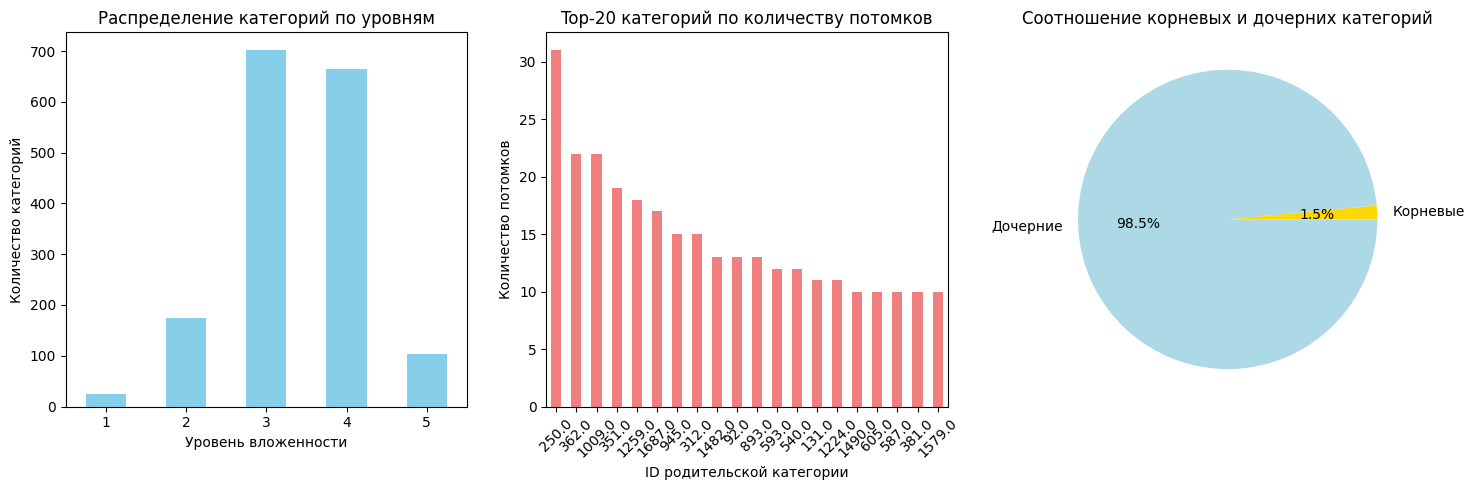


3. 🏆 TOP-10 РОДИТЕЛЬСКИХ КАТЕГОРИЙ:
   - Категория 250: 31 потомков
     Примеры потомков: [7, 1252, 463, 543, 457]
   - Категория 362: 22 потомков
     Примеры потомков: [741, 508, 512, 1432, 1069]
   - Категория 1009: 22 потомков
     Примеры потомков: [534, 1358, 198, 501, 1556]
   - Категория 351: 19 потомков
     Примеры потомков: [102, 21, 1570, 1633, 119]
   - Категория 1259: 18 потомков
     Примеры потомков: [1427, 1061, 389, 166, 996]
   - Категория 1687: 17 потомков
     Примеры потомков: [108, 1512, 32, 294, 68]
   - Категория 945: 15 потомков
     Примеры потомков: [912, 128, 303, 962, 1246]
   - Категория 312: 15 потомков
     Примеры потомков: [257, 607, 1251, 297, 50]
   - Категория 1482: 13 потомков
     Примеры потомков: [730, 228, 593, 1249, 1426]
   - Категория 92: 13 потомков
     Примеры потомков: [1000, 558, 637, 437, 1610]

4. 🔍 АНАЛИЗ ИЗОЛИРОВАННЫХ КАТЕГОРИЙ:
   - Листовых категорий (без потомков): 1,307

5. 📈 СТАТИСТИКА ПО ЧИСЛОВЫМ ЗНАЧЕНИЯМ:
        category

In [11]:
print("=" * 80)
print("ГЛУБОКИЙ АНАЛИЗ CATEGORY_TREE")
print("=" * 80)

# 1. Базовая информация
print("1. 📊 БАЗОВАЯ ИНФОРМАЦИЯ:")
print(f"   - Всего записей: {len(category_tree):,}")
print(f"   - Уникальных категорий: {category_tree['categoryid'].nunique():,}")
print(f"   - Пропуски в parentid: {category_tree['parentid'].isna().sum():,}")

# 2. Анализ структуры дерева
print("\n2. 🌳 СТРУКТУРА ДЕРЕВА КАТЕГОРИЙ:")
# Корневые категории (без родителя)
root_categories = category_tree[category_tree['parentid'].isna()]
print(f"   - Корневых категорий: {len(root_categories):,}")

# Уровни вложенности
category_hierarchy = category_tree.copy()
category_hierarchy['level'] = 1

# Простой анализ глубины (первые 3 уровня)
max_iterations = 5
for level in range(2, max_iterations + 1):
    parent_categories = category_hierarchy[category_hierarchy['level'] == level - 1]['categoryid']
    mask = category_hierarchy['parentid'].isin(parent_categories)
    category_hierarchy.loc[mask, 'level'] = level

print(f"   - Распределение по уровням:")
level_counts = category_hierarchy['level'].value_counts().sort_index()
for level, count in level_counts.items():
    print(f"     Уровень {level}: {count:,} категорий")

# 3. Визуализация распределения
plt.figure(figsize=(15, 5))

# График 1: Распределение категорий по уровням
plt.subplot(1, 3, 1)
level_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение категорий по уровням')
plt.xlabel('Уровень вложенности')
plt.ylabel('Количество категорий')
plt.xticks(rotation=0)

# График 2: Top-20 самых "родительских" категорий
plt.subplot(1, 3, 2)
parent_counts = category_tree['parentid'].value_counts().head(20)
parent_counts.plot(kind='bar', color='lightcoral')
plt.title('Top-20 категорий по количеству потомков')
plt.xlabel('ID родительской категории')
plt.ylabel('Количество потомков')
plt.xticks(rotation=45)

# График 3: Корневые vs не корневые категории
plt.subplot(1, 3, 3)
root_vs_child = [len(root_categories), len(category_tree) - len(root_categories)]
labels = ['Корневые', 'Дочерние']
plt.pie(root_vs_child, labels=labels, autopct='%1.1f%%', colors=['gold', 'lightblue'])
plt.title('Соотношение корневых и дочерних категорий')

plt.tight_layout()
plt.show()

# 4. Детальный анализ топ-10 родительских категорий
print("\n3. 🏆 TOP-10 РОДИТЕЛЬСКИХ КАТЕГОРИЙ:")
top_parents = category_tree['parentid'].value_counts().head(10)
for parent_id, count in top_parents.items():
    if pd.isna(parent_id):
        continue
    child_categories = category_tree[category_tree['parentid'] == parent_id]['categoryid'].tolist()
    print(f"   - Категория {int(parent_id)}: {count:,} потомков")
    print(f"     Примеры потомков: {child_categories[:5]}")

# 5. Поиск изолированных категорий (без потомков и не являющихся потомками)
print("\n4. 🔍 АНАЛИЗ ИЗОЛИРОВАННЫХ КАТЕГОРИЙ:")
categories_with_children = set(category_tree['parentid'].dropna().unique())
all_categories = set(category_tree['categoryid'].unique())

# Категории, которые не являются чьими-то родителями
leaf_categories = all_categories - categories_with_children
print(f"   - Листовых категорий (без потомков): {len(leaf_categories):,}")

# 6. Статистика по числовым значениям
print("\n5. 📈 СТАТИСТИКА ПО ЧИСЛОВЫМ ЗНАЧЕНИЯМ:")
print(category_tree.describe())

print("\n" + "=" * 80)
print("ВЫВОДЫ ПО CATEGORY_TREE:")
print("=" * 80)
print("✅ Дерево категорий содержит сложную иерархическую структуру")
print("✅ Есть корневые категории и несколько уровней вложенности")
print("✅ Некоторые категории имеют много потомков (популярные родительские категории)")
print("✅ Большое количество листовых категорий (конечные товарные группы)")

ГЛУБОКИЙ АНАЛИЗ CATEGORY_TREE
1. 📊 БАЗОВАЯ ИНФОРМАЦИЯ:
   - Всего записей: 1,669
   - Уникальных категорий: 1,669
   - Пропуски в parentid: 25

2. 🌳 СТРУКТУРА ДЕРЕВА КАТЕГОРИЙ:
   - Корневых категорий (без родителя): 25
   - Категорий, имеющих дочерние: 362
   - Конечных категорий (без дочерних): 1,307

3. 📈 РАСПРЕДЕЛЕНИЕ ДОЧЕРНИХ КАТЕГОРИЙ:
   - Максимум дочерних категорий у одного родителя: 31
   - Среднее количество дочерних категорий: 4.5
   - Медиана количества дочерних категорий: 4.0


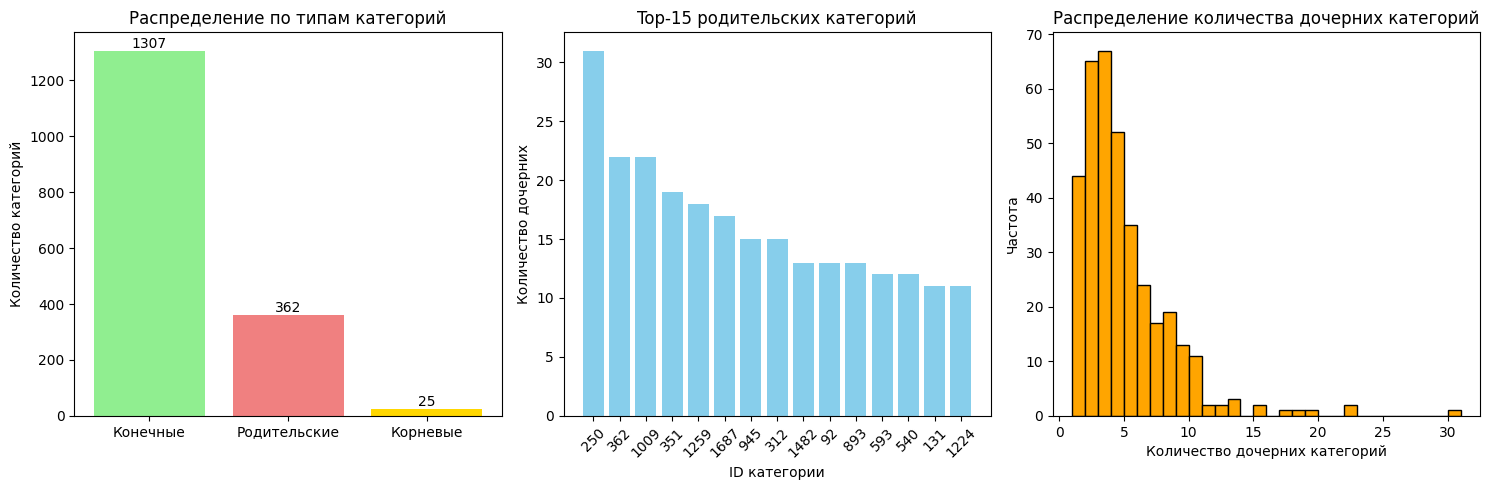

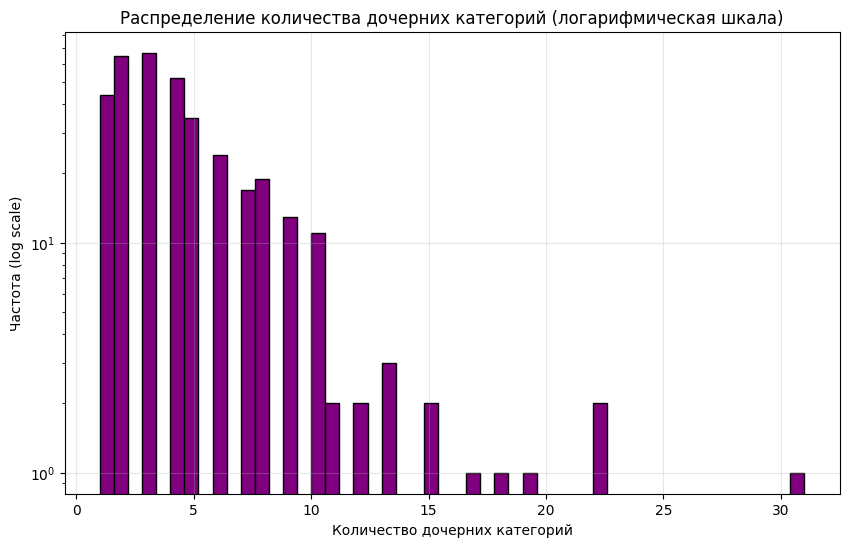


4. 🏆 ДЕТАЛЬНЫЙ АНАЛИЗ TOP-5 РОДИТЕЛЬСКИХ КАТЕГОРИЙ:
   - Категория 250: 31 дочерних категорий
   - Категория 362: 22 дочерних категорий
   - Категория 1009: 22 дочерних категорий
   - Категория 351: 19 дочерних категорий
   - Категория 1259: 18 дочерних категорий

5. 🔍 ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ:
   - 'Сиротских' parentid (нет в categoryid): 0

6. 📊 СТАТИСТИКА:
        categoryid     parentid
count  1669.000000  1644.000000
mean    849.285201   847.571168
std     490.195116   505.058485
min       0.000000     8.000000
25%     427.000000   381.000000
50%     848.000000   866.000000
75%    1273.000000  1291.000000
max    1698.000000  1698.000000

ВЫВОДЫ ПО CATEGORY_TREE:
✅ Всего 1,669 категорий в иерархии
✅ 25 корневых категорий (без родителя)
✅ 362 категорий имеют дочерние категории
✅ 1,307 конечных категорий (без дочерних)
✅ Максимальная ширина дерева: 31 дочерних у одного родителя
📊 Графики сохранены в папку 'eda_plots/' для MLflow


In [12]:
import os
import matplotlib.pyplot as plt

# Создаем папку для графиков
os.makedirs('eda_plots', exist_ok=True)

print("=" * 80)
print("ГЛУБОКИЙ АНАЛИЗ CATEGORY_TREE")
print("=" * 80)

# 1. Базовая информация
print("1. 📊 БАЗОВАЯ ИНФОРМАЦИЯ:")
print(f"   - Всего записей: {len(category_tree):,}")
print(f"   - Уникальных категорий: {category_tree['categoryid'].nunique():,}")
print(f"   - Пропуски в parentid: {category_tree['parentid'].isna().sum():,}")

# 2. Анализ структуры дерева
print("\n2. 🌳 СТРУКТУРА ДЕРЕВА КАТЕГОРИЙ:")

# Корневые категории (без родителя)
root_categories = category_tree[category_tree['parentid'].isna()]
print(f"   - Корневых категорий (без родителя): {len(root_categories):,}")

# Категории, которые являются родителями (имеют дочерние)
parent_categories = category_tree[category_tree['categoryid'].isin(category_tree['parentid'])]
print(f"   - Категорий, имеющих дочерние: {parent_categories['categoryid'].nunique():,}")

# Конечные категории (не являются родителями)
leaf_categories = category_tree[~category_tree['categoryid'].isin(category_tree['parentid'])]
print(f"   - Конечных категорий (без дочерних): {leaf_categories['categoryid'].nunique():,}")

# 3. Анализ распределения количества дочерних категорий
print("\n3. 📈 РАСПРЕДЕЛЕНИЕ ДОЧЕРНИХ КАТЕГОРИЙ:")
child_counts = category_tree['parentid'].value_counts()
print(f"   - Максимум дочерних категорий у одного родителя: {child_counts.max()}")
print(f"   - Среднее количество дочерних категорий: {child_counts.mean():.1f}")
print(f"   - Медиана количества дочерних категорий: {child_counts.median():.1f}")

# 4. Визуализация с сохранением графиков
plt.figure(figsize=(15, 5))

# График 1: Типы категорий
plt.subplot(1, 3, 1)
category_types = [len(leaf_categories), len(parent_categories), len(root_categories)]
labels = ['Конечные', 'Родительские', 'Корневые']
plt.bar(labels, category_types, color=['lightgreen', 'lightcoral', 'gold'])
plt.title('Распределение по типам категорий')
plt.ylabel('Количество категорий')
for i, v in enumerate(category_types):
    plt.text(i, v, str(v), ha='center', va='bottom')

# График 2: Top-15 родительских категорий по количеству дочерних
plt.subplot(1, 3, 2)
top_parents = child_counts.head(15)
plt.bar([str(int(x)) for x in top_parents.index], top_parents.values, color='skyblue')
plt.title('Top-15 родительских категорий')
plt.xlabel('ID категории')
plt.ylabel('Количество дочерних')
plt.xticks(rotation=45)

# График 3: Распределение количества дочерних категорий
plt.subplot(1, 3, 3)
plt.hist(child_counts.values, bins=30, color='orange', edgecolor='black')
plt.title('Распределение количества дочерних категорий')
plt.xlabel('Количество дочерних категорий')
plt.ylabel('Частота')

plt.tight_layout()
plt.savefig('eda_plots/category_tree_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Дополнительные графики
# График 4: Распределение категорий (логарифмическая шкала)
plt.figure(figsize=(10, 6))
plt.hist(child_counts.values, bins=50, color='purple', edgecolor='black', log=True)
plt.title('Распределение количества дочерних категорий (логарифмическая шкала)')
plt.xlabel('Количество дочерних категорий')
plt.ylabel('Частота (log scale)')
plt.grid(True, alpha=0.3)
plt.savefig('eda_plots/category_tree_distribution_log.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Детальный анализ топ-5 родительских категорий
print("\n4. 🏆 ДЕТАЛЬНЫЙ АНАЛИЗ TOP-5 РОДИТЕЛЬСКИХ КАТЕГОРИЙ:")
top_5_parents = child_counts.head(5)
for parent_id, child_count in top_5_parents.items():
    if pd.isna(parent_id):
        continue
    print(f"   - Категория {int(parent_id)}: {child_count} дочерних категорий")

# 7. Проверка целостности данных
print("\n5. 🔍 ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ:")
# Категории, которые есть в parentid, но нет в categoryid
orphan_parents = set(category_tree['parentid'].dropna()) - set(category_tree['categoryid'])
print(f"   - 'Сиротских' parentid (нет в categoryid): {len(orphan_parents)}")

# 8. Статистика
print("\n6. 📊 СТАТИСТИКА:")
print(category_tree.describe())

print("\n" + "=" * 80)
print("ВЫВОДЫ ПО CATEGORY_TREE:")
print("=" * 80)
print(f"✅ Всего {len(category_tree):,} категорий в иерархии")
print(f"✅ {len(root_categories):,} корневых категорий (без родителя)")
print(f"✅ {len(parent_categories):,} категорий имеют дочерние категории") 
print(f"✅ {len(leaf_categories):,} конечных категорий (без дочерних)")
print(f"✅ Максимальная ширина дерева: {child_counts.max()} дочерних у одного родителя")
print(f"📊 Графики сохранены в папку 'eda_plots/' для MLflow")